# Telecom Churn Study
# Project Brief
To retain the high Profitable customers and telecom companies needs to predict the customers who are at high risk of churn using the dataset of Telecom customer.

### Objective:

- Identify customers at high risk of churn
- Identify the main features of churn
- Prepaid customers churn identification is critical to business. Define the term churn for prepaid customers Data is also based on the Indian and South Asian Market where Prepaid users are more.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc., over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this case study, we will use the usage-based definition to define churn.

80% of revenue comes from the top 20% customers (called high-value customers). Predicted churn only on High-value customers

## Understanding the Business Objective and the Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this, understanding the typical customer behaviour during churn will be helpful.

## Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. We define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available for prediction. Thus, after tagging churn as 1/0 based on this phase, we discard all data corresponding to this phase.

## Import and Clean Data
Step by step Data Understanding, Cleaning, Missing Value Treatment and EDA was done and EDA results were interpreted.


In [4]:
# Importing the required library for data manipulation, data visualisation and for modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading the given CSV file into telecom creating a dataframe.
telecomdf = pd.read_csv("telecom_churn_data.csv")
telecomdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
telecomdf.shape

(99999, 226)

##### Frome the above method we can conclude that there are 99999 rows and about 226 column present in the data provided

## Data Cleaning 
#### Data will be cleaned based on the percentage of null value it has and the column irrelavent to the analysis

In [7]:
# Having a look at the data type and values in each columns
telecomdf.info(max_cols=300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [8]:
telecomdf.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [9]:
telecomdf.shape

(99999, 226)

In [10]:
# Dropping all rows having all values are NULL
telecomdf.dropna(axis=0, how='all', inplace=True)

In [11]:
# Calculating the percentage of missing values in all the columns
column_names = round(100*(telecomdf.isnull().sum()/len(telecomdf.index)), 2)
column_names

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

In [12]:
# Extracting Names of the column having more than 70% null value.
column_names = list(column_names[column_names.values >= 70].index)
print("Total number of columns:", len(column_names))
print("Column names are,")
print(column_names)

Total number of columns: 40
Column names are,
['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [13]:
# We see a trend in the missing values for these columns
# date_of_last_rech_data_x
# total_rech_data_x
# max_rech_data_x
# count_rech_2g_x
# av_rech_amt_data_x
# arpu_3g_x
# arpu_2g_x
# night_pck_user_x
# fb_user_x
# All of these have the same number of missing values and all seem to involve mobile internet related data.
# These columns probably indicate that the customer had not done any data related recharge, for a particular month
# And these could indicate the customers who do not recharge with internet packs.
columns_with_70perct_null = telecomdf[column_names]
column_names_data = round(100*(columns_with_70perct_null.isnull().sum()/len(columns_with_70perct_null.index)), 2)
column_names_data

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [14]:
# Dropping the columns containing more than 70% null value.
telecomdf.drop(labels = column_names,axis =1,inplace=True)   
telecomdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


In [15]:
telecomdf.shape

(99999, 186)

##### After Droping coulmns containing more than 70% null value we get  186 columns having data more than 80%

In [16]:
# Checking no of unique values in the columns
unique_list = telecomdf.nunique()
unique_list

mobile_number           99999
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6            6512
roam_ic_mou_7            5230
roam_ic_mou_8            5315
roam_ic_mou_9            4827
roam_og_mou_6            8038
roam_og_mou_7            6639
roam_og_mou_8            6504
roam_og_mou_9            5882
loc_og_t2t_mou_6        13539
                        ...  
last_day_rch_amt_9        185
vol_2g_mb_6             15201
vol_2g_mb_

#### The column containing only one unique value will be dropped as it is same for all the rows and it wouldnt affect the analysis

In [17]:
# Skimming the column names containing only one unique vlaue
unique_list = unique_list[unique_list.values == 1]
print("Unique columns count: ", len(unique_list))
print(unique_list)

Unique columns count:  16
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64


In [18]:
# Dropping the unique value columns
telecomdf.drop(labels=unique_list.index,axis=1,inplace=True)
telecomdf.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,...,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,...,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


In [19]:
telecomdf.shape

(99999, 170)

##### There were 16 columns having only one unique value and has been removed and the column reduce further to 170

In [20]:
telecomdf.info(max_cols=170)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Data columns (total 170 columns):
mobile_number          99999 non-null int64
arpu_6                 99999 non-null float64
arpu_7                 99999 non-null float64
arpu_8                 99999 non-null float64
arpu_9                 99999 non-null float64
onnet_mou_6            96062 non-null float64
onnet_mou_7            96140 non-null float64
onnet_mou_8            94621 non-null float64
onnet_mou_9            92254 non-null float64
offnet_mou_6           96062 non-null float64
offnet_mou_7           96140 non-null float64
offnet_mou_8           94621 non-null float64
offnet_mou_9           92254 non-null float64
roam_ic_mou_6          96062 non-null float64
roam_ic_mou_7          96140 non-null float64
roam_ic_mou_8          94621 non-null float64
roam_ic_mou_9          92254 non-null float64
roam_og_mou_6          96062 non-null float64
roam_og_mou_7          96140 non-null float64
roam_og_mou_8     

In [21]:
column_names = round(100*(telecomdf.isnull().sum()/len(telecomdf.index)), 2)

# Extracting Names of the column
column_names = list(column_names[column_names.values >= 1].index)
column_names

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


In [22]:
#Imputing all the columns, other than date field.
all_columns = []
for col in column_names:
    if(not col.startswith('date_of_')):
        all_columns.append(col)

len(all_columns)

108

In [23]:
# Imputing the above mentioned columns with 0
for i in all_columns:
    telecomdf.loc[telecomdf[i].isnull(),i] = 0

In [24]:
round(100*(telecomdf.isnull().sum()/len(telecomdf.index)), 2)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
                     ... 
last_day_rch_amt_9    0.0
vol_2g_mb_6           0.0
vol_2g_mb_7           0.0
vol_2g_mb_8           0.0
vol_2g_mb_9           0.0
vol_3g_mb_6           0.0
vol_3g_mb_7           0.0
vol_3g_mb_8 

## Derived metrics
#### New columns are created to help in analysis. These data are derived using existing data in different column.

In [25]:
#Find the average recharge amount for June and July to filter the high value customer
telecomdf['avg_rech_amt_6_7'] = (telecomdf['total_rech_amt_6'] + telecomdf['total_rech_amt_7']) / 2

In [26]:
# To calculate the difference between two dates
# Deriving from date columns since we need numeric values
# The number of days between two months recharge seems like a good indicator
def find_diff_between_dates(firstDate, secondDate):
    new_col = 'diff_bw_last_rech_' + firstDate[-1] + '_' + secondDate[-1]
    telecomdf[new_col] = (telecomdf[secondDate] - telecomdf[firstDate]).dt.days
    telecomdf[new_col] = pd.to_numeric(telecomdf[new_col])

In [27]:
# Converting the object data type to date time
telecomdf['date_of_last_rech_6'] = pd.to_datetime(telecomdf['date_of_last_rech_6'])
telecomdf['date_of_last_rech_7'] = pd.to_datetime(telecomdf['date_of_last_rech_7'])
telecomdf['date_of_last_rech_8'] = pd.to_datetime(telecomdf['date_of_last_rech_8'])

In [28]:
#Get the difference between June and July
find_diff_between_dates('date_of_last_rech_6','date_of_last_rech_7')

#Get the difference between July and August
find_diff_between_dates('date_of_last_rech_7','date_of_last_rech_8')

In [29]:
telecomdf.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,diff_bw_last_rech_6_7,diff_bw_last_rech_7_8
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,...,0,0,968,30.4,0.0,101.20,3.58,307.0,25.0,23.0
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,0,0,1006,0.0,0.0,0.00,0.00,229.0,32.0,28.0
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,...,0,0,1103,0.0,0.0,4.17,0.00,241.5,37.0,21.0
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,...,0,0,2491,0.0,0.0,0.00,0.00,270.0,33.0,31.0
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,0,0,1526,0.0,0.0,0.00,0.00,273.0,32.0,12.0


### Filtering high-value customers

In [30]:
#Filter high value customer based on 70th percentile
high_value_cust_df = telecomdf[telecomdf['avg_rech_amt_6_7'] > telecomdf.avg_rech_amt_6_7.quantile(0.7)]
high_value_cust_df.shape

(29979, 173)

### Tag churners

In [31]:
#Find out whether any customer did not receive incoming/outgoing calls nor used internet
df1 = high_value_cust_df.loc[(high_value_cust_df.total_ic_mou_9 == 0) & 
                       (high_value_cust_df.total_og_mou_9 == 0) & 
                       (high_value_cust_df.vol_2g_mb_9 == 0) &
                       (high_value_cust_df.vol_3g_mb_9 == 0)]
df1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,diff_bw_last_rech_6_7,diff_bw_last_rech_7_8
7,7000701601,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,0.0,453.43,...,0,0,802,57.74,19.38,18.74,0.0,1185.0,28.0,32.0
97,7000589828,374.863,294.023,183.043,0.0,433.59,415.66,221.06,0.0,74.54,...,0,0,502,0.00,0.00,0.00,0.0,380.0,32.0,30.0
111,7001300706,596.301,146.073,0.000,0.0,55.19,3.26,0.00,0.0,45.51,...,0,0,332,0.00,0.00,0.00,0.0,441.0,44.0,28.0
143,7000106299,695.609,39.981,0.000,0.0,1325.91,28.61,0.00,0.0,13.91,...,0,0,264,0.00,0.00,0.00,0.0,418.0,22.0,37.0
188,7000340381,734.641,183.668,0.000,0.0,4.38,0.98,0.00,0.0,105.16,...,0,0,244,0.00,831.48,1223.04,0.0,492.0,9.0,NaN


In [32]:
# Skim through the data
df1[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0
143,0.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0


In [33]:
#Mark the customer who didnt get any incoming/outgoing calls nor used internet as churners & rest of the customers as non churners
high_value_cust_df['churn'] = np.where((high_value_cust_df.total_ic_mou_9 == 0) & 
                                       (high_value_cust_df.total_og_mou_9 == 0) & 
                                       (high_value_cust_df.vol_2g_mb_9 == 0) &
                                       (high_value_cust_df.vol_3g_mb_9 == 0), '1', '0')

high_value_cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,diff_bw_last_rech_6_7,diff_bw_last_rech_7_8,churn
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,...,0,802,57.74,19.38,18.74,0.0,1185.0,28.0,32.0,1
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,315,21.03,910.65,122.16,0.0,519.0,36.0,30.0,0
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,...,0,2607,0.00,0.00,0.00,0.0,380.0,32.0,39.0,0
16,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,0,511,0.00,2.45,21.89,0.0,459.0,31.0,14.0,0
17,7000187447,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,...,0,667,0.00,0.00,0.00,0.0,408.0,30.0,26.0,0


In [34]:
high_value_cust_df.shape

(29979, 174)

#### Removing all the attributes corresponding to the churn phase

In [35]:
#Remove all the attributes having _9 in their name
allcolumns = round(100*(high_value_cust_df.isnull().sum()/len(high_value_cust_df.index)), 2)
allcolumn_names = allcolumns.index

allcolumn_having_9 = []
for col in allcolumn_names:
    if(col.find('_9') != -1):
        allcolumn_having_9.append(col)

len(allcolumn_having_9)

41

In [36]:
high_value_cust_df.drop(labels=allcolumn_having_9, axis=1, inplace=True)
high_value_cust_df.shape

(29979, 133)

##### There were 41 columns having _9 in their name and has been removed and the column reduce further to 133

In [37]:
high_value_cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,diff_bw_last_rech_6_7,diff_bw_last_rech_7_8,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,802,57.74,19.38,18.74,0.0,1185.0,28.0,32.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,315,21.03,910.65,122.16,0.0,519.0,36.0,30.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,0,2607,0.00,0.00,0.00,0.0,380.0,32.0,39.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,...,0,511,0.00,2.45,21.89,0.0,459.0,31.0,14.0,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,...,0,667,0.00,0.00,0.00,0.0,408.0,30.0,26.0,0


In [38]:
high_value_cust_df.info(max_cols=140)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 133 columns):
mobile_number            29979 non-null int64
arpu_6                   29979 non-null float64
arpu_7                   29979 non-null float64
arpu_8                   29979 non-null float64
onnet_mou_6              29979 non-null float64
onnet_mou_7              29979 non-null float64
onnet_mou_8              29979 non-null float64
offnet_mou_6             29979 non-null float64
offnet_mou_7             29979 non-null float64
offnet_mou_8             29979 non-null float64
roam_ic_mou_6            29979 non-null float64
roam_ic_mou_7            29979 non-null float64
roam_ic_mou_8            29979 non-null float64
roam_og_mou_6            29979 non-null float64
roam_og_mou_7            29979 non-null float64
roam_og_mou_8            29979 non-null float64
loc_og_t2t_mou_6         29979 non-null float64
loc_og_t2t_mou_7         29979 non-null float64
loc_og_t2t_mou_8         299

##### Column such as date_of_last_rech_6, mobile_number etc does not impact the analysis hence these column would not be required for analysis.

In [39]:
# Dropping the date columns
high_value_cust_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

In [40]:
# sep_vbc_3g belongs to the churn phase, hence dropping
high_value_cust_df.drop(['sep_vbc_3g'], axis = 1, inplace =True)

In [41]:
#Dropping mobile number as it does not provide any insights
high_value_cust_df.drop(['mobile_number'], axis = 1,inplace = True)

In [42]:
# Dropping any rows with any column having a null values
# We have a deecent amount of data, even the churn data that is dropped is not significant
high_value_cust_df.dropna(how='any', axis=0,inplace=True)

In [43]:
# Renaming the following columns for uniforrmity
# jun_vbc_3g
# jul_vbc_3g
# aug_vbc_3g
high_value_cust_df.rename(columns = {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'}, inplace = True)

In [44]:
high_value_cust_df.shape

(29285, 128)

In [45]:
# Converting all these column to numeric to be able to derive statistics values from these column 
columns_to_numeric = ['churn','diff_bw_last_rech_6_7','diff_bw_last_rech_7_8']
high_value_cust_df[columns_to_numeric] = high_value_cust_df[columns_to_numeric].apply(pd.to_numeric)
high_value_cust_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_rech_amt_6_7,diff_bw_last_rech_6_7,diff_bw_last_rech_7_8,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,802,57.74,19.38,18.74,1185.0,28.0,32.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,315,21.03,910.65,122.16,519.0,36.0,30.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0,0,2607,0.00,0.00,0.00,380.0,32.0,39.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0,0,511,0.00,2.45,21.89,459.0,31.0,14.0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0,0,667,0.00,0.00,0.00,408.0,30.0,26.0,0


In [46]:
# We are considering the average of June and July month as the good phase feature and combining them
# and dropping of indiviual columns
cols = list(high_value_cust_df.columns)
for x in cols:
    if x.endswith('_6'):
        new_column_name = 'avg_'+x+'_7'
        col_7 = x.replace('6','7')
        high_value_cust_df[new_column_name] = (high_value_cust_df[x] + high_value_cust_df[col_7])/2
        print(col_7)
        high_value_cust_df.drop([x,col_7], axis = 1, inplace=True)

arpu_7
onnet_mou_7
offnet_mou_7
roam_ic_mou_7
roam_og_mou_7
loc_og_t2t_mou_7
loc_og_t2m_mou_7
loc_og_t2f_mou_7
loc_og_t2c_mou_7
loc_og_mou_7
std_og_t2t_mou_7
std_og_t2m_mou_7
std_og_t2f_mou_7
std_og_mou_7
isd_og_mou_7
spl_og_mou_7
og_others_7
total_og_mou_7
loc_ic_t2t_mou_7
loc_ic_t2m_mou_7
loc_ic_t2f_mou_7
loc_ic_mou_7
std_ic_t2t_mou_7
std_ic_t2m_mou_7
std_ic_t2f_mou_7
std_ic_mou_7
total_ic_mou_7
spl_ic_mou_7
isd_ic_mou_7
ic_others_7
total_rech_num_7
total_rech_amt_7
max_rech_amt_7
last_day_rch_amt_7
vol_2g_mb_7
vol_3g_mb_7
monthly_2g_7
sachet_2g_7
monthly_3g_7
sachet_3g_7
vbc_3g_7


## Outliers detection

In [47]:
# comparing mean and median
print(high_value_cust_df['avg_rech_amt_6_7'].mean())
print(high_value_cust_df['avg_rech_amt_6_7'].median())

697.714239371692
570.0


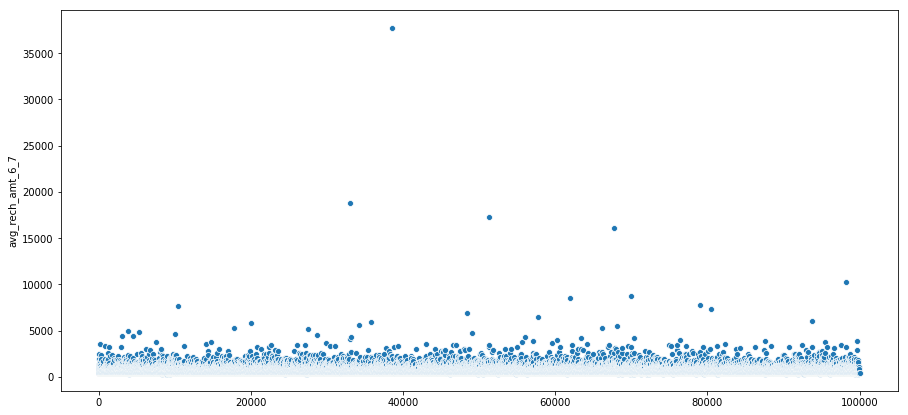

In [48]:
# Plotting the scatter plot to find the outliers.
plt.figure(figsize=(15, 7))
sns.scatterplot(x = high_value_cust_df.index,y='avg_rech_amt_6_7', data = high_value_cust_df)
plt.show()

#### It can be seen that median is not comparable with mean and there is a huge difference between them this is also shown by the scatter plot wherein most of the average recharge lies below 20000 and hence we should remove outliers

In [49]:
# comparing mean and median
print(high_value_cust_df['total_rech_amt_8'].mean())
print(high_value_cust_df['total_rech_amt_8'].median())

626.4925388424108
528.0


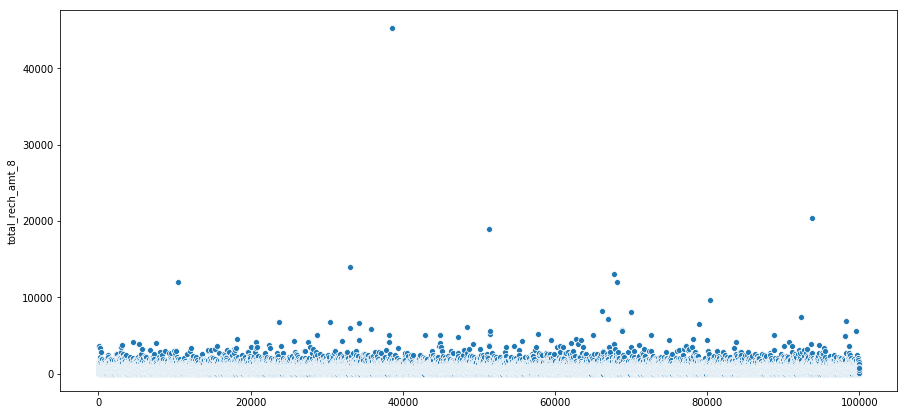

In [50]:
# Plotting the scatter plot to find the outliers.
plt.figure(figsize=(15, 7))
sns.scatterplot(x = high_value_cust_df.index,y='total_rech_amt_8', data = high_value_cust_df)
plt.show()

In [51]:
high_value_cust_df['avg_rech_amt_6_7'].quantile(1)

37762.5

In [52]:
high_value_cust_df['total_rech_amt_8'].quantile(1)

45320.0

In [53]:
# Outlier treatment
high_value_cust_df = high_value_cust_df.loc[high_value_cust_df["total_rech_amt_8"] < 45320.00,: ]
high_value_cust_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,avg_total_rech_amt_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_vol_2g_mb_6_7,avg_vol_3g_mb_6_7,avg_monthly_2g_6_7,avg_sachet_2g_6_7,avg_monthly_3g_6_7,avg_sachet_3g_6_7,avg_vbc_3g_6_7
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,...,1185.0,1185.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,...,519.0,122.0,25.0,178.0,375.475,0.5,0.5,0.0,0.0,516.405
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,...,380.0,110.0,80.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,...,459.0,110.0,100.0,0.0,0.000,0.0,0.0,0.0,0.0,12.170
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,...,408.0,55.0,15.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000


In [54]:
high_value_cust_df.shape

(29284, 87)

In [55]:
# Outlier treatment
high_value_cust_df = high_value_cust_df.loc[high_value_cust_df["avg_rech_amt_6_7"] < 37762.50,: ]
high_value_cust_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,avg_total_rech_amt_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_vol_2g_mb_6_7,avg_vol_3g_mb_6_7,avg_monthly_2g_6_7,avg_sachet_2g_6_7,avg_monthly_3g_6_7,avg_sachet_3g_6_7,avg_vbc_3g_6_7
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,...,1185.0,1185.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,...,519.0,122.0,25.0,178.0,375.475,0.5,0.5,0.0,0.0,516.405
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,...,380.0,110.0,80.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,...,459.0,110.0,100.0,0.0,0.000,0.0,0.0,0.0,0.0,12.170
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,...,408.0,55.0,15.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000


In [56]:
high_value_cust_df.shape

(29284, 87)

## Univariate Analysis 
### This will be Divided into two categories as:
 - Continuous Variables
 - Categorical Variables

### Continuous Variables
#### We will look at various numerical variables present in the data and these will be subjected to the statistical metrics to find the central tendancy and the spread of the variable and visualisation method such as box plot and distribution plot will be used to present the data and insights. 

In [57]:
#Understand the datatype of all the columns
high_value_cust_df.info(max_cols=130)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29284 entries, 7 to 99997
Data columns (total 87 columns):
arpu_8                      29284 non-null float64
onnet_mou_8                 29284 non-null float64
offnet_mou_8                29284 non-null float64
roam_ic_mou_8               29284 non-null float64
roam_og_mou_8               29284 non-null float64
loc_og_t2t_mou_8            29284 non-null float64
loc_og_t2m_mou_8            29284 non-null float64
loc_og_t2f_mou_8            29284 non-null float64
loc_og_t2c_mou_8            29284 non-null float64
loc_og_mou_8                29284 non-null float64
std_og_t2t_mou_8            29284 non-null float64
std_og_t2m_mou_8            29284 non-null float64
std_og_t2f_mou_8            29284 non-null float64
std_og_mou_8                29284 non-null float64
isd_og_mou_8                29284 non-null float64
spl_og_mou_8                29284 non-null float64
og_others_8                 29284 non-null float64
total_og_mou_8          

Summary metrics are looked in batch of 20 columns, and Observations are summarized in EDA Summary Section below.

In [58]:
print('Summary metrics - Numeric Variables')

numeric_df = (high_value_cust_df.iloc[:,0:20])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_value_cust_df.iloc[:,20:40])._get_numeric_data()
print(numeric_df.describe())
  
numeric_df = (high_value_cust_df.iloc[:,40:60])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_value_cust_df.iloc[:,60:87])._get_numeric_data()
print(numeric_df.describe())

Summary metrics - Numeric Variables
             arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  29284.000000  29284.000000  29284.000000   29284.000000   29284.000000   
mean     542.216794    272.279433    379.581295      13.519980      21.864511   
std      452.576920    469.618653    474.908935      75.424977     107.392053   
min     -345.129000      0.000000      0.000000       0.000000       0.000000   
25%      299.076750     29.325000    101.380000       0.000000       0.000000   
50%      458.050500    103.250000    246.180000       0.000000       0.000000   
75%      677.284000    304.387500    488.507500       0.000000       0.000000   
max    19295.904000  10752.560000  14007.340000    4169.810000    5337.040000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      29284.000000      29284.000000      29284.000000      29284.000000   
mean          88.491071        169.512425          6.534869          1.7

       avg_isd_og_mou_6_7  avg_spl_og_mou_6_7  avg_og_others_6_7  \
count        29284.000000        29284.000000       29284.000000   
mean             2.066409            6.703497           0.370755   
std             39.904186           18.487153           1.859592   
min              0.000000            0.000000           0.000000   
25%              0.000000            0.000000           0.000000   
50%              0.000000            1.755000           0.000000   
75%              0.000000            7.050000           0.000000   
max           5695.470000         1144.500000         185.065000   

       avg_total_og_mou_6_7  avg_loc_ic_t2t_mou_6_7  avg_loc_ic_t2m_mou_6_7  \
count          29284.000000            29284.000000            29284.000000   
mean             700.375256               70.083004              161.022184   
std              608.635551              154.769865              209.100072   
min                0.000000                0.000000                0.00

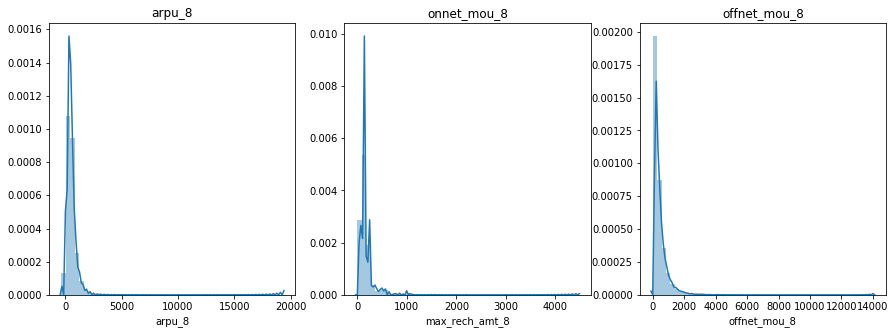

In [59]:
# Plotting the distribution plot and the box plot of the arpu_8, onnet_mou_8 and offnet_mou_8
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.distplot(high_value_cust_df["arpu_8"])
plt.title("arpu_8")
plt.subplot(1, 3, 2)
sns.distplot(high_value_cust_df["max_rech_amt_8"])
plt.title("onnet_mou_8")
plt.subplot(1, 3, 3)
sns.distplot(high_value_cust_df["offnet_mou_8"])
plt.title("offnet_mou_8")
plt.show()

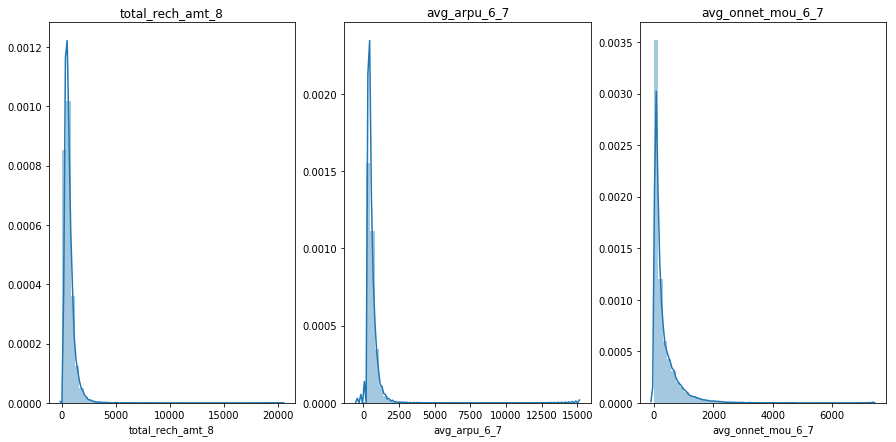

In [60]:
# Plotting the distribution plot and the box plot of the total_rech_amt_8, avg_arpu_6_7 and avg_onnet_mou_6_7
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
sns.distplot(high_value_cust_df["total_rech_amt_8"])
plt.title("total_rech_amt_8")
plt.subplot(1, 3, 2)
sns.distplot(high_value_cust_df["avg_arpu_6_7"])
plt.title("avg_arpu_6_7")
plt.subplot(1, 3, 3)
sns.distplot(high_value_cust_df["avg_onnet_mou_6_7"])
plt.title("avg_onnet_mou_6_7")
plt.show()

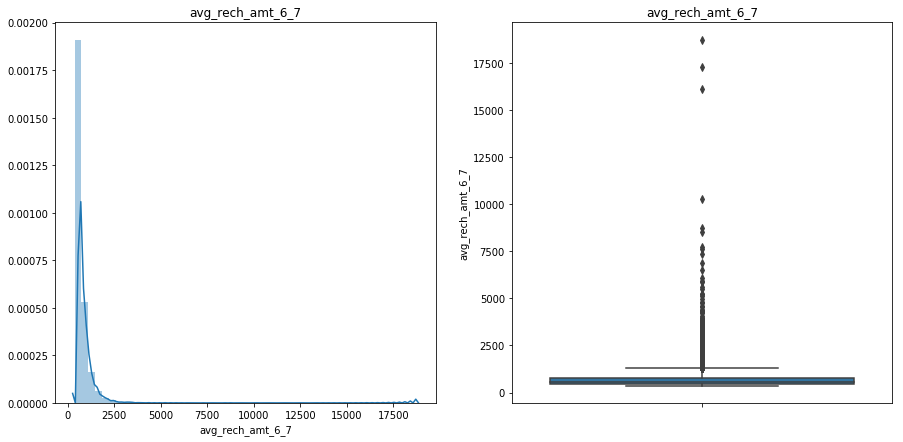

In [61]:
# Plotting the distribution plot and the box plot of the avg_rech_amt_6_7 amount
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.distplot(high_value_cust_df["avg_rech_amt_6_7"])
plt.title("avg_rech_amt_6_7")
plt.subplot(1, 2, 2)
sns.boxplot( x="avg_rech_amt_6_7", data=high_value_cust_df,orient = 'v')
plt.title("avg_rech_amt_6_7")
plt.show()

In [62]:
high_value_cust_df.shape

(29284, 87)

In [63]:
Churn=high_value_cust_df.groupby('churn').size()

In [64]:
Churn

churn
0    27032
1     2252
dtype: int64

In [65]:
print(len(high_value_cust_df.index))
print("Negative Chrun in percent:{}".format((Churn[0]/len(high_value_cust_df.index))*100))
print("Positive Chrun in percent:{}".format((Churn[1]/len(high_value_cust_df.index))*100))

29284
Negative Chrun in percent:92.30979374402403
Positive Chrun in percent:7.690206255975959


In [66]:
ChurnBy=high_value_cust_df.groupby(['churn']).size()

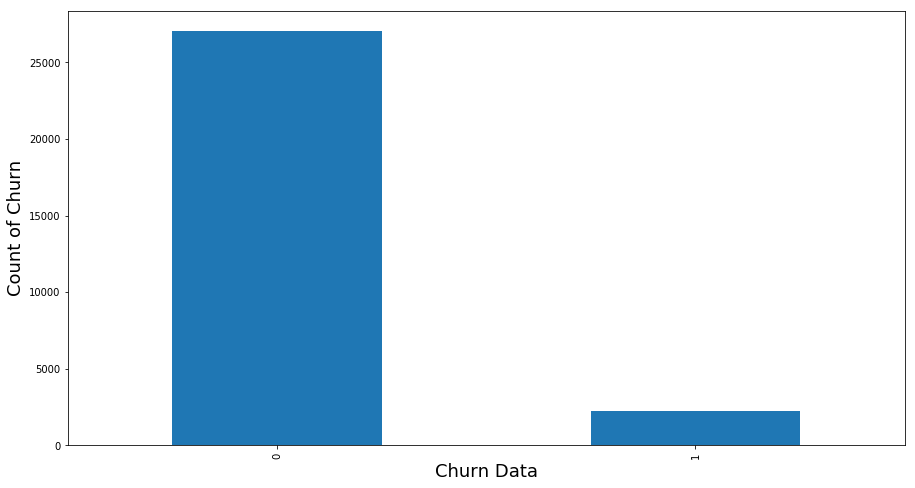

In [67]:
ChurnBy.plot(kind= 'bar', figsize=(15,8))
plt.xlabel('Churn Data', fontsize=18)
plt.ylabel('Count of Churn', fontsize=18)
plt.show()


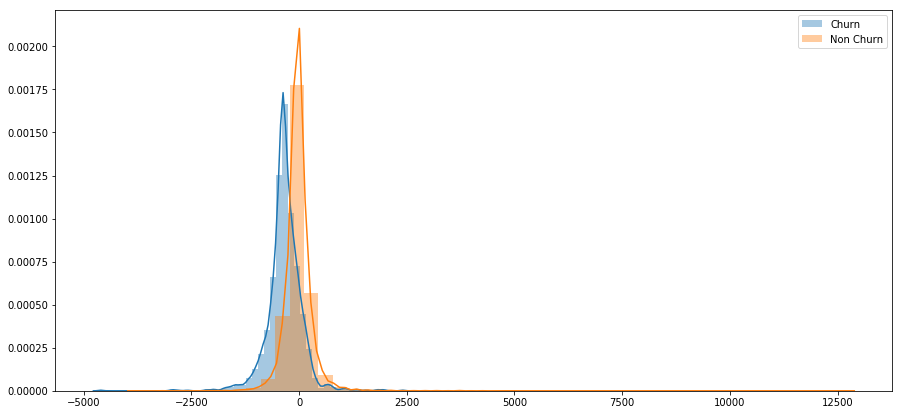

In [68]:
# Seeing how the average revenue changes from Good phase to action phase for churn and non churn data
# We see that for non churn customers, the peak is 0, indicating no change in revenue
# We see that for churn customers, the revenue change is negative, indicating less recharge to 8
df_ch = high_value_cust_df[high_value_cust_df.churn == 1]
df_non_ch = high_value_cust_df[high_value_cust_df.churn == 0]

plt.figure(figsize=(15, 7))
sns.distplot(df_ch['arpu_8'] - df_ch['avg_arpu_6_7'],  kde=True, label='Churn')
sns.distplot(df_non_ch['arpu_8'] - df_non_ch['avg_arpu_6_7'],  kde=True, label='Non Churn')

plt.legend(labels=['Churn','Non Churn'])
plt.show()

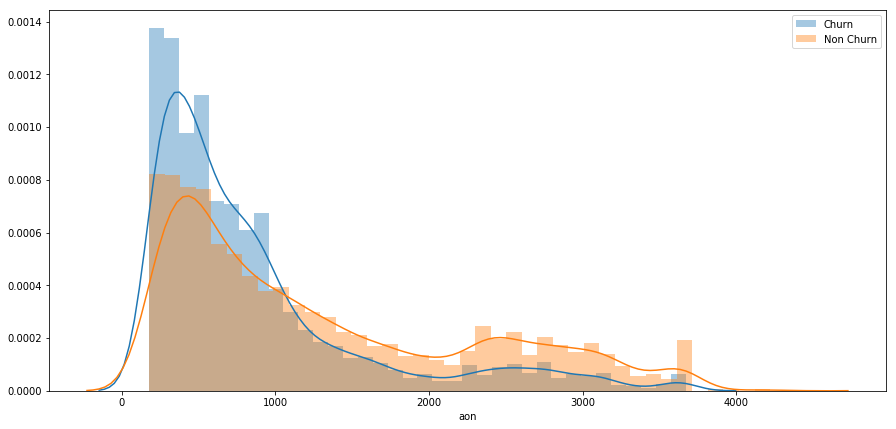

In [69]:
# Seeing how long the churners and non churners have been with the network
# We see that the churners are more during the first 1000 days withe the network
# But after 1000 days the cutomers are less likely to churn
plt.figure(figsize=(15, 7))
sns.distplot(df_ch['aon'],  kde=True, label='Churn')
sns.distplot(df_non_ch['aon'],  kde=True, label='Non Churn')

plt.legend(labels=['Churn','Non Churn'])
plt.show()

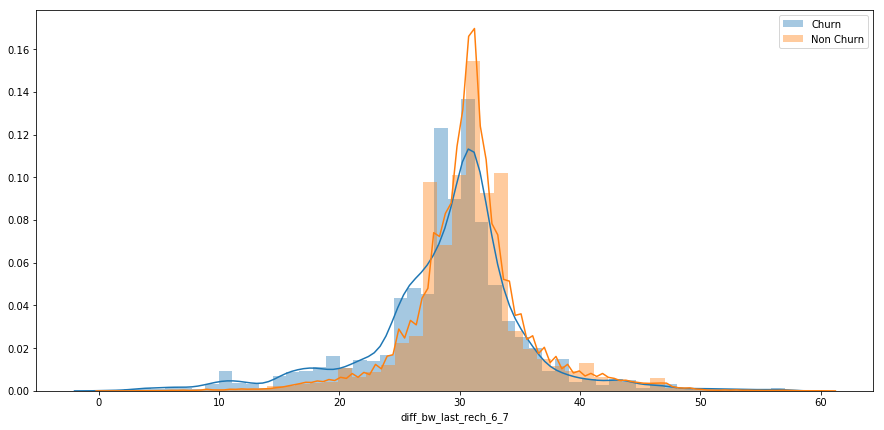

In [70]:
# We see that most customers recharge once in 30 days
plt.figure(figsize=(15, 7))
sns.distplot(df_ch['diff_bw_last_rech_6_7'],  kde=True, label='Churn')
sns.distplot(df_non_ch['diff_bw_last_rech_6_7'],  kde=True, label='Non Churn')

plt.legend(labels=['Churn','Non Churn'])
plt.show()

## Bivariate Analysis

In [71]:
high_value_cust_df_correlation = high_value_cust_df.corr()
high_value_cust_df_correlation

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,avg_total_rech_amt_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_vol_2g_mb_6_7,avg_vol_3g_mb_6_7,avg_monthly_2g_6_7,avg_sachet_2g_6_7,avg_monthly_3g_6_7,avg_sachet_3g_6_7,avg_vbc_3g_6_7
arpu_8,1.000000,0.335766,0.512759,0.109086,0.203002,0.160892,0.335959,0.144754,0.056792,0.326260,...,0.699764,0.310754,0.261962,0.013829,0.166978,0.005830,-0.017185,0.174905,0.032984,0.155383
onnet_mou_8,0.335766,1.000000,0.058039,0.008466,0.076236,0.455666,-0.011586,-0.042535,0.066662,0.284826,...,0.213424,-0.037703,-0.004591,-0.060351,-0.075613,-0.084060,-0.029544,-0.076575,-0.024280,-0.077161
offnet_mou_8,0.512759,0.058039,1.000000,0.031744,0.111284,0.055592,0.439011,0.084917,0.061902,0.320586,...,0.333997,0.040924,0.074474,-0.047992,-0.071789,-0.054324,-0.039811,-0.056640,-0.038977,-0.053239
roam_ic_mou_8,0.109086,0.008466,0.031744,1.000000,0.560159,-0.012390,-0.055920,-0.017076,0.000821,-0.044614,...,0.104722,0.084911,0.062145,0.007383,0.016115,-0.003227,-0.011638,0.027491,-0.004342,0.035992
roam_og_mou_8,0.203002,0.076236,0.111284,0.560159,1.000000,-0.025170,-0.054920,-0.023193,0.002899,-0.052577,...,0.167937,0.091384,0.100729,0.000942,-0.001946,-0.019497,-0.021547,0.009467,-0.010967,0.013210
loc_og_t2t_mou_8,0.160892,0.455666,0.055592,-0.012390,-0.025170,1.000000,0.187872,0.052527,0.014237,0.769170,...,0.115702,0.055042,0.041865,-0.017442,-0.006036,0.000549,0.005448,-0.001564,-0.009048,0.016224
loc_og_t2m_mou_8,0.335959,-0.011586,0.439011,-0.055920,-0.054920,0.187872,1.000000,0.194572,0.002368,0.769899,...,0.226825,0.145511,0.148362,-0.031532,-0.007187,0.017875,-0.029652,0.011248,-0.023884,0.029850
loc_og_t2f_mou_8,0.144754,-0.042535,0.084917,-0.017076,-0.023193,0.052527,0.194572,1.000000,-0.008211,0.213419,...,0.105362,0.245709,0.205484,-0.020079,0.010707,0.029597,-0.047021,0.034556,-0.020039,0.040271
loc_og_t2c_mou_8,0.056792,0.066662,0.061902,0.000821,0.002899,0.014237,0.002368,-0.008211,1.000000,0.010259,...,0.021126,-0.022596,-0.027677,0.010652,-0.003804,-0.010887,0.024262,-0.014367,0.029878,-0.001099
loc_og_mou_8,0.326260,0.284826,0.320586,-0.044614,-0.052577,0.769170,0.769899,0.213419,0.010259,1.000000,...,0.225271,0.141981,0.133052,-0.032495,-0.007892,0.013394,-0.017991,0.008076,-0.022189,0.031754


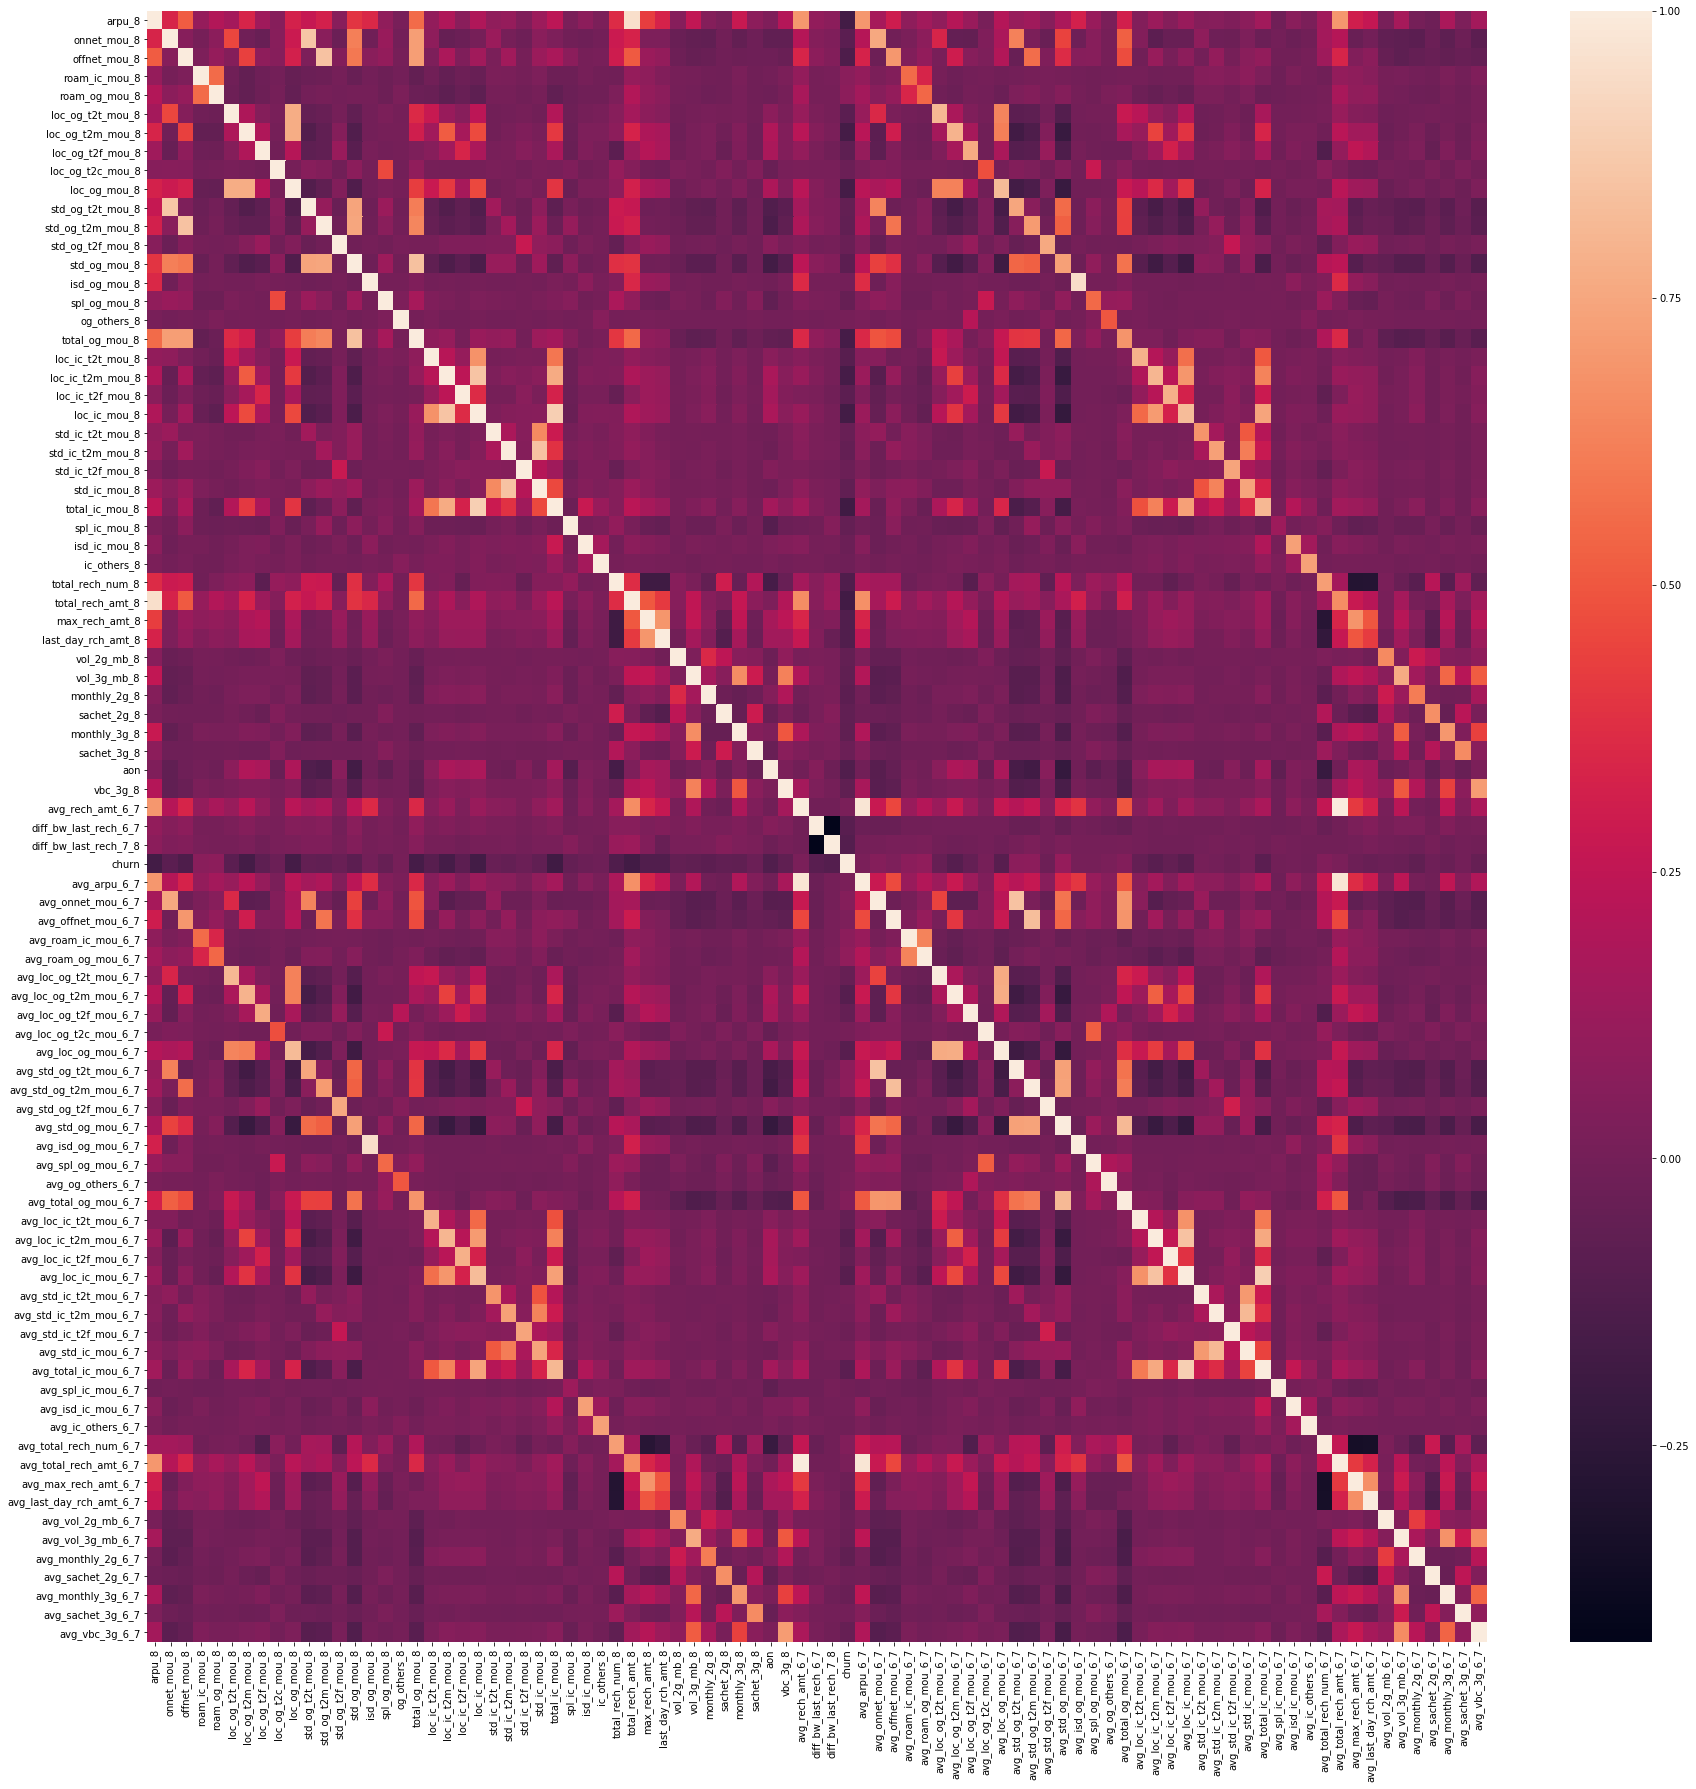

In [72]:
# There seems to be a lot of correlation between different features, hence using PCA
plt.figure(figsize = (30,30))   
sns.heatmap(high_value_cust_df.corr())

In [73]:
high_value_cust_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,avg_total_rech_amt_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_vol_2g_mb_6_7,avg_vol_3g_mb_6_7,avg_monthly_2g_6_7,avg_sachet_2g_6_7,avg_monthly_3g_6_7,avg_sachet_3g_6_7,avg_vbc_3g_6_7
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,...,1185.0,1185.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,...,519.0,122.0,25.0,178.0,375.475,0.5,0.5,0.0,0.0,516.405
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,...,380.0,110.0,80.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,...,459.0,110.0,100.0,0.0,0.000,0.0,0.0,0.0,0.0,12.170
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,...,408.0,55.0,15.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000


In [74]:
high_value_cust_df.select_dtypes(exclude=['object'])

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,avg_total_rech_amt_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_vol_2g_mb_6_7,avg_vol_3g_mb_6_7,avg_monthly_2g_6_7,avg_sachet_2g_6_7,avg_monthly_3g_6_7,avg_sachet_3g_6_7,avg_vbc_3g_6_7
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,...,1185.0,1185.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,...,519.0,122.0,25.0,178.000,375.475,0.5,0.5,0.0,0.0,516.405
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,...,380.0,110.0,80.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,...,459.0,110.0,100.0,0.000,0.000,0.0,0.0,0.0,0.0,12.170
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,...,408.0,55.0,15.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,...,640.0,50.0,25.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
24,354.793,141.11,283.36,13.83,22.93,2.48,72.03,20.83,3.15,95.34,...,385.0,110.0,110.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,...,1932.0,753.5,126.0,72.405,5832.275,0.0,0.0,4.5,2.0,2210.750
38,393.909,666.38,97.81,0.00,0.00,9.48,18.96,0.00,0.00,28.44,...,528.0,70.0,20.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
41,229.769,80.44,136.69,0.00,0.00,80.44,107.88,14.88,0.00,203.21,...,503.0,150.0,150.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000


## PCA with Logistic Regression
### Data Preparation for PCA

In [75]:
# Putting feature variable to X
X = high_value_cust_df.drop(['churn'],axis=1)

# Putting response variable to y
y = high_value_cust_df["churn"]

# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=100)

In [77]:
#Looking at the shape of the data
print(X_train.shape)
print(X_test.shape)

(20498, 86)
(8786, 86)


### Handling class imbalance

In [78]:
# Handling data imbalance
# use this to import - "pip install -U imbalanced-learn"
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_train_final, y_train_final = sm.fit_sample(X_train, y_train)

print(X_train_final.shape)
print(y_train_final.shape)
print("The percentage of churners in the balanced dataset = {}".format(np.count_nonzero(y_train_final)/len(X_train_final)*100))

(37836, 86)
(37836,)
The percentage of churners in the balanced dataset = 50.0


In [79]:
#Convert into dataframe
X_train_final = pd.DataFrame(X_train_final)
y_train_final = pd.DataFrame(y_train_final)

In [80]:
# Performing PCA on the balanced dataset
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing PCA on train data
pca.fit(X_train_final)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [81]:
#fit the model on training data
df_train_pca = pca.fit_transform(X_train_final)
print(df_train_pca.shape)

#fit the model on test data
df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(37836, 86)
(8786, 86)


In [82]:
# Performing logisitic regression on the PCA components
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(df_train_pca, y_train_final)

# Predicted probabilities
y_pred = logreg.predict(df_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [83]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

[[6688 1426]
 [  97  575]]


In [84]:
print("Accuracy score for the model = ", accuracy_score(y_test,y_pred))

Accuracy score for the model =  0.8266560437058957


In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      8114
           1       0.29      0.86      0.43       672

    accuracy                           0.83      8786
   macro avg       0.64      0.84      0.66      8786
weighted avg       0.93      0.83      0.86      8786



In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# See the sensitivity of our logistic regression mode
# Sensitivity is pretty high for the model indicating 
TP / float(TP+FN)

0.8556547619047619

In [88]:
# Calculate specificity
TN / float(TN+FP)

0.8242543751540548

In [89]:
pca.components_

array([[ 2.68272077e-01,  1.38059473e-01,  1.81371581e-01, ...,
         5.43560503e-02,  7.61008436e-03,  5.87856101e-02],
       [-1.03601188e-02,  1.28346435e-01,  5.95999798e-02, ...,
        -9.64368879e-02, -9.77056162e-03, -1.07332862e-01],
       [ 1.02578748e-01, -3.98449278e-02, -2.69202895e-02, ...,
         9.90504982e-02,  1.28525238e-02,  7.99890226e-02],
       ...,
       [ 2.12154925e-07, -9.44101312e-07, -2.04048324e-06, ...,
         5.50798964e-08, -4.95523368e-08,  1.29524507e-08],
       [-2.54424272e-07, -6.91033713e-07, -1.56926396e-06, ...,
         4.22508279e-08,  1.70662903e-07,  8.58799935e-08],
       [-5.27048107e-16, -7.00544349e-15, -6.94014539e-15, ...,
        -1.80143426e-16,  1.71099103e-17, -2.88130794e-16]])

In [90]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0], 
                       'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,0.268272,-0.010360,0.102579,arpu_8
1,0.138059,0.128346,-0.039845,onnet_mou_8
2,0.181372,0.059600,-0.026920,offnet_mou_8
3,0.035968,-0.001800,0.247267,roam_ic_mou_8
4,0.068420,0.018680,0.332777,roam_og_mou_8
5,0.100851,-0.048881,-0.093109,loc_og_t2t_mou_8
6,0.147537,-0.119940,-0.101084,loc_og_t2m_mou_8
7,0.061593,-0.078084,-0.015086,loc_og_t2f_mou_8
8,0.032602,0.022490,-0.019277,loc_og_t2c_mou_8
9,0.162689,-0.112408,-0.125486,loc_og_mou_8


In [91]:
pca.explained_variance_ratio_

array([1.15470361e-01, 9.09356998e-02, 6.78163154e-02, 4.63202078e-02,
       4.41065934e-02, 4.32917444e-02, 4.08557299e-02, 3.56277941e-02,
       3.35625746e-02, 2.77492736e-02, 2.66330243e-02, 2.48824440e-02,
       2.27212760e-02, 2.06339509e-02, 1.97907585e-02, 1.76091403e-02,
       1.69868376e-02, 1.62246615e-02, 1.52609877e-02, 1.42159264e-02,
       1.36200835e-02, 1.31657919e-02, 1.27379895e-02, 1.20641579e-02,
       1.04109760e-02, 9.98432520e-03, 9.51498660e-03, 8.98264865e-03,
       8.69094429e-03, 8.61163327e-03, 8.17738137e-03, 7.96502091e-03,
       7.88946145e-03, 7.74513968e-03, 7.58074711e-03, 7.33712967e-03,
       6.75668524e-03, 6.47839488e-03, 6.36397013e-03, 6.05226521e-03,
       5.91655741e-03, 5.36649367e-03, 4.68720369e-03, 4.28900981e-03,
       4.19987934e-03, 4.03593102e-03, 3.92339281e-03, 3.68461480e-03,
       3.62963555e-03, 3.36937800e-03, 3.22846022e-03, 3.15322314e-03,
       3.03502315e-03, 2.80152314e-03, 2.75143895e-03, 2.45089895e-03,
      

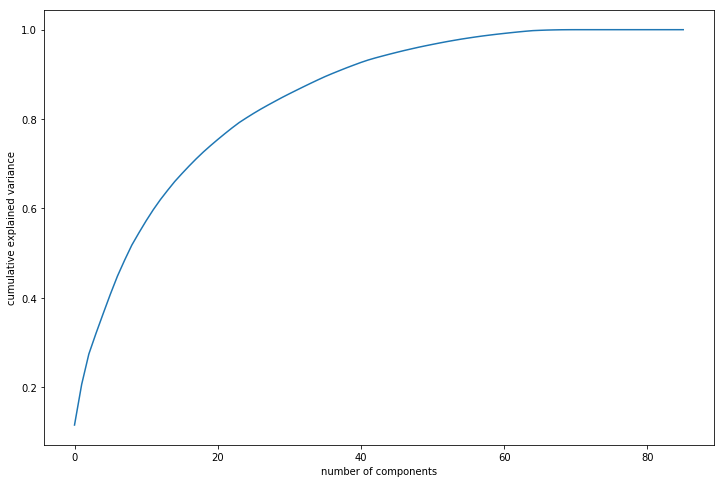

In [92]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

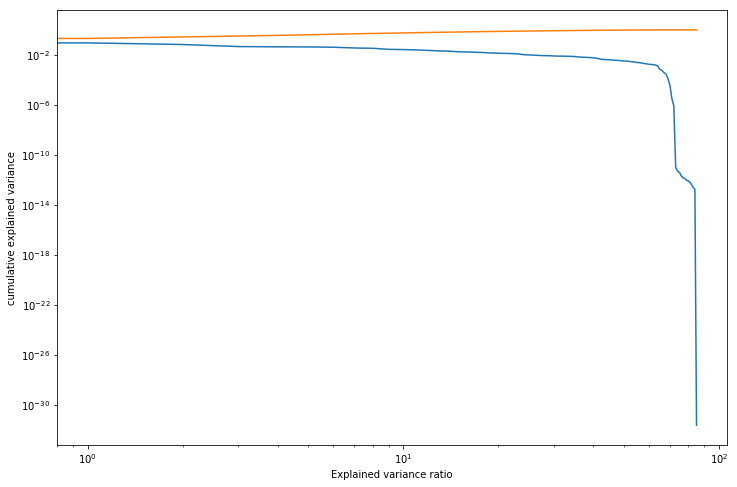

In [93]:
#Making the screeplot - plotting the cumulative variance against the explained variance ration
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.yscale('log')
plt.xscale('log')
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Explained variance ratio')
plt.ylabel('cumulative explained variance')
plt.show()

In [94]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 11.55,  20.64,  27.42,  32.05,  36.46,  40.79,  44.88,  48.44,
        51.8 ,  54.57,  57.23,  59.72,  61.99,  64.05,  66.03,  67.79,
        69.49,  71.11,  72.64,  74.06,  75.42,  76.74,  78.01,  79.22,
        80.26,  81.26,  82.21,  83.11,  83.98,  84.84,  85.66,  86.46,
        87.25,  88.02,  88.78,  89.51,  90.19,  90.84,  91.48,  92.09,
        92.68,  93.22,  93.69,  94.12,  94.54,  94.94,  95.33,  95.7 ,
        96.06,  96.4 ,  96.72,  97.04,  97.34,  97.62,  97.9 ,  98.15,
        98.39,  98.61,  98.81,  99.  ,  99.18,  99.35,  99.51,  99.66,
        99.79,  99.86,  99.92,  99.96,  99.99, 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  ])

### Reduce the number of variables using PCA

In [95]:
# We see about 45 components explain abut 90% variance in data
# Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)

In [96]:
df_train_pca = pca_final.fit_transform(X_train_final)
df_train_pca.shape

(37836, 45)

In [97]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

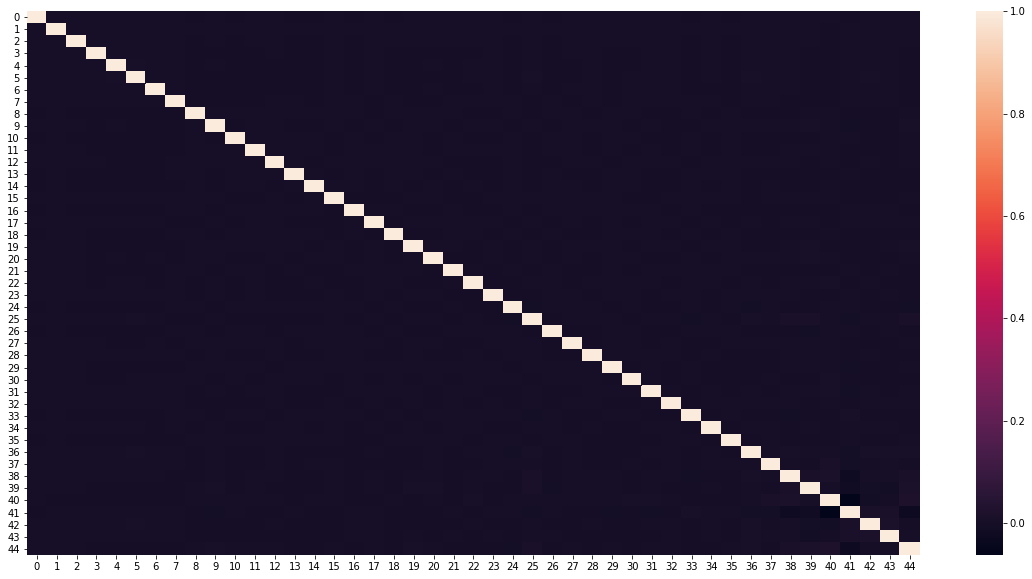

In [98]:
#plotting the correlation matrix
# We see the entire matrix is dark except the diagonals indicating very less correlation
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = False)

In [99]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:", corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.019108450379265486 , min corr:  -0.062367485562609494


In [100]:
#Applying selected components to the test data - 45 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8786, 45)

In [101]:
#Training the model on the train data
# Performing logistic regression on the PCA components
from sklearn.linear_model import LogisticRegression
logreg_45 = LogisticRegression()
logreg_45.fit(df_train_pca, y_train_final)

# Predicted probabilities
y_pred = logreg_45.predict(df_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [102]:
#Checking the mean square error
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

0.1751650352834054

In [107]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

[[6677 1437]
 [ 102  570]]


In [108]:
print("Accuracy score for the model = ", accuracy_score(y_test,y_pred))

Accuracy score for the model =  0.8248349647165946


In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      8114
           1       0.28      0.85      0.43       672

    accuracy                           0.82      8786
   macro avg       0.63      0.84      0.66      8786
weighted avg       0.93      0.82      0.86      8786



In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(TP)
print(TN)
print(FP)
print(FN)

570
6677
1437
102


In [111]:
# Cee the sensitivity of our logistic regression mode
# Sensitivity is pretty high for the model indicating 
TP / float(TP+FN)

0.8482142857142857

In [112]:
# Calculate specificity
TN / float(TN+FP)

0.8228986936159723

**Thus we see with only 45 components we have achieved almost the same accuracy and sensitivity**

In [113]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0], 
                       'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,0.268272,-0.010360,0.102579,arpu_8
1,0.138059,0.128346,-0.039845,onnet_mou_8
2,0.181372,0.059600,-0.026920,offnet_mou_8
3,0.035968,-0.001800,0.247267,roam_ic_mou_8
4,0.068420,0.018680,0.332777,roam_og_mou_8
5,0.100851,-0.048881,-0.093109,loc_og_t2t_mou_8
6,0.147537,-0.119940,-0.101084,loc_og_t2m_mou_8
7,0.061593,-0.078084,-0.015086,loc_og_t2f_mou_8
8,0.032602,0.022490,-0.019277,loc_og_t2c_mou_8
9,0.162689,-0.112408,-0.125486,loc_og_mou_8


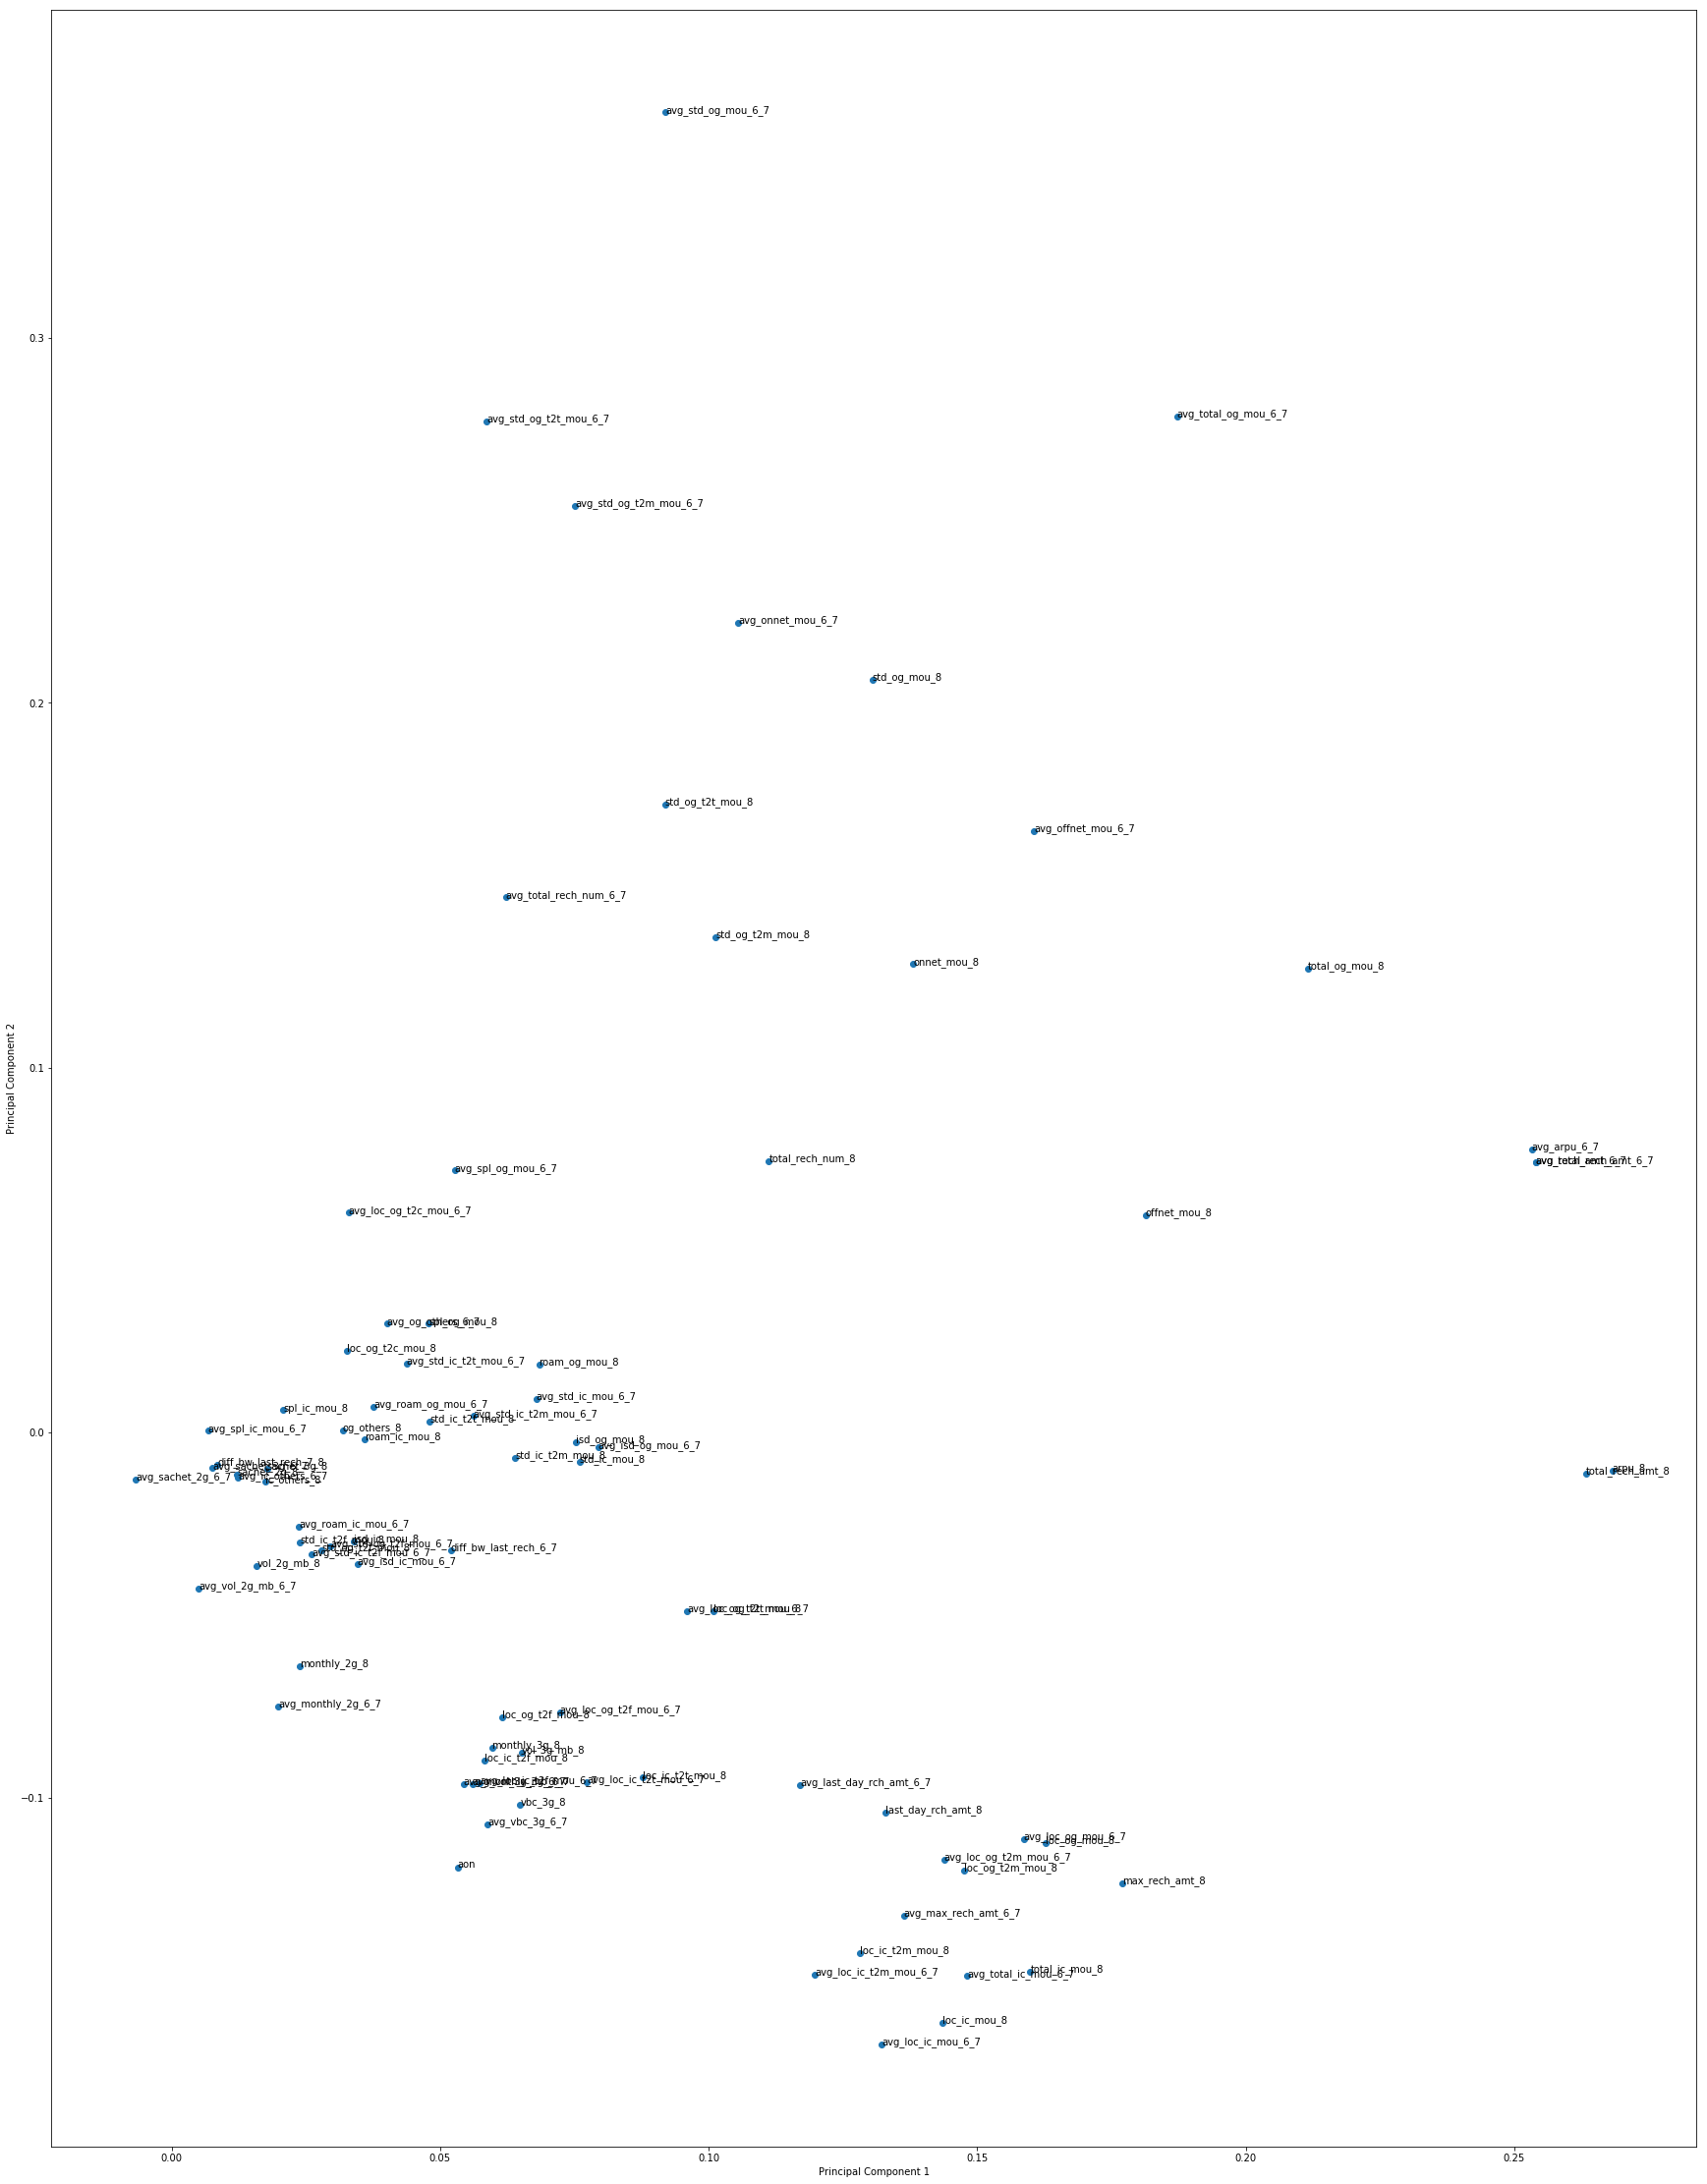

In [114]:
%matplotlib inline
fig = plt.figure(figsize = (30,40))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
#plt.tight_layout()
plt.show()

In [115]:
df_train_pca.shape

(37836, 45)

In [116]:
from sklearn import metrics

In [117]:
#training the regression model
LogSk_learner_pca2 = LogisticRegression(class_weight='balanced')
model_pca2 = LogSk_learner_pca2.fit(df_train_pca,y_train_final)

In [118]:
#Making prediction on the test data
pred_probs_test= model_pca2.predict_proba(df_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.90'

In [119]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_test)

In [120]:
y_pred_df.head()

,0
0,0.032155
1,0.084918
2,0.002063
3,0.928215
4,0.485699


In [121]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[0]]

In [122]:
y_pred_1.head()

,0
0,0.032155
1,0.084918
2,0.002063
3,0.928215
4,0.485699


In [123]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
70334,0
69253,0
27939,0
8699,0
26567,0


In [124]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [125]:
y_pred_1.head()

,0
0,0.032155
1,0.084918
2,0.002063
3,0.928215
4,0.485699


In [126]:
y_test_df.head()

,churn
0,0
1,0
2,0
3,0
4,0


In [127]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [128]:
y_pred_final.head()

,churn,0
0,0,0.032155
1,0,0.084918
2,0,0.002063
3,0,0.928215
4,0,0.485699


In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [130]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['churn','Churn_Prob'], axis=1)

In [131]:
y_pred_final.head()

,churn,Churn_Prob
0,0,0.032155
1,0,0.084918
2,0,0.002063
3,0,0.928215
4,0,0.485699


In [132]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [133]:
y_pred_final.head()

,churn,Churn_Prob,predicted
0,0,0.032155,0
1,0,0.084918,0
2,0,0.002063,0
3,0,0.928215,1
4,0,0.485699,0


In [134]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6677, 1437],
       [ 102,  570]], dtype=int64)

In [135]:
#Check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.predicted)

0.8248349647165946

In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(TP)
print(TN)
print(FP)
print(FN)

570
6677
1437
102


In [137]:
#Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.032155,0,1,0,0,0,0,0,0,0,0,0
1,0,0.084918,0,1,0,0,0,0,0,0,0,0,0
2,0,0.002063,0,1,0,0,0,0,0,0,0,0,0
3,0,0.928215,1,1,1,1,1,1,1,1,1,1,1
4,0,0.485699,0,1,1,1,1,1,0,0,0,0,0


In [138]:
#Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.076485  0.000000  1.000000
0.1   0.1  0.422946  0.377989  0.965774
0.2   0.2  0.568290  0.536727  0.949405
0.3   0.3  0.678352  0.657999  0.924107
0.4   0.4  0.759276  0.748336  0.891369
0.5   0.5  0.824835  0.822899  0.848214
0.6   0.6  0.873094  0.879344  0.797619
0.7   0.7  0.906328  0.921740  0.720238
0.8   0.8  0.922490  0.953167  0.552083
0.9   0.9  0.925791  0.981144  0.257440


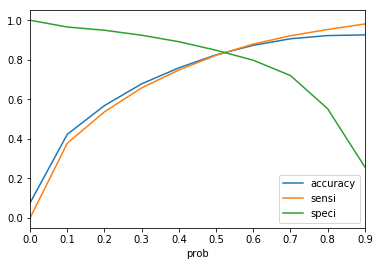

In [139]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [140]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)

In [141]:
#Check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.final_predicted)


0.7592761211017528

In [145]:
confusion1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.final_predicted )
confusion1

array([[6072, 2042],
       [  73,  599]], dtype=int64)

In [146]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [147]:
# Let's see the sensitivity
TP / float(TP+FN)

0.8913690476190477

## Building And Evaluating Model for Identifying Important Driver Variables

## Random Forest

In [148]:
X_train.shape

(20498, 86)

In [149]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.9,1:0.9})

In [150]:
# fit the model
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.9, 1: 0.9},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [151]:
# Making predictions
predictions = rfc.predict(X_test)

In [152]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [153]:
# Check the report of default model
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8114
           1       0.69      0.37      0.48       672

    accuracy                           0.94      8786
   macro avg       0.82      0.68      0.72      8786
weighted avg       0.93      0.94      0.93      8786



In [154]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8004  110]
 [ 424  248]]


In [155]:
print(accuracy_score(y_test,predictions))

0.9392214887320738


In [156]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rfc1 = RandomForestClassifier()

# fit tree on training data
rfc1 = GridSearchCV(rfc1, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    return_train_score=True)
rfc1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [157]:
# scores of GridSearch CV
scores = rfc1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.190628,0.009715,0.006560,0.000966,2,{'max_depth': 2},0.942927,0.939268,0.936829,0.938278,...,0.939262,0.002019,2,0.938163,0.940298,0.941334,0.940484,0.940789,0.940214,0.001084
1,0.538385,0.013462,0.006419,0.001016,7,{'max_depth': 7},0.943659,0.938537,0.937073,0.940229,...,0.939994,0.002208,1,0.949140,0.948957,0.949567,0.948533,0.948351,0.948910,0.000434
2,0.829471,0.026787,0.008168,0.000664,12,{'max_depth': 12},0.944146,0.935366,0.934146,0.939253,...,0.938384,0.003505,4,0.973960,0.974936,0.975485,0.977377,0.974998,0.975351,0.001127
3,1.033881,0.061019,0.009393,0.001345,17,{'max_depth': 17},0.944634,0.936585,0.937561,0.937302,...,0.938628,0.003020,3,0.991523,0.990731,0.991340,0.989390,0.990243,0.990645,0.000775


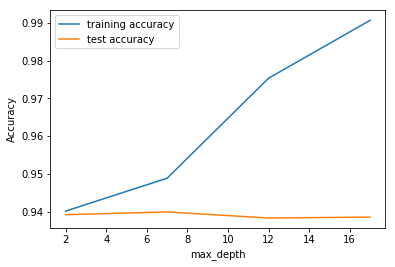

In [158]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [159]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(1, 10, 1)}

# instantiate the model
rfc2 = RandomForestClassifier()

# fit tree on training data
rfc2 = GridSearchCV(rfc2, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    return_train_score=True)
rfc2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [160]:
# scores of GridSearch CV
scores = rfc2.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.135047,0.010892,0.003389,0.000672,1,{'n_estimators': 1},0.909024,0.915610,0.901463,0.905831,...,0.909308,0.005321,9,0.966703,0.967191,0.966703,0.963595,0.967010,0.966241,0.001336
1,0.242046,0.013597,0.004405,0.000472,2,{'n_estimators': 2},0.931707,0.929512,0.922927,0.928275,...,0.928286,0.002914,8,0.970606,0.971094,0.968960,0.970181,0.968291,0.969826,0.001044
2,0.324473,0.013084,0.005606,0.000552,3,{'n_estimators': 3},0.934146,0.927805,0.935854,0.930715,...,0.931262,0.003278,7,0.984083,0.984937,0.985547,0.986219,0.984389,0.985035,0.000774
3,0.451131,0.020804,0.006438,0.001003,4,{'n_estimators': 4},0.939512,0.934634,0.931951,0.935106,...,0.935555,0.002479,5,0.981705,0.983169,0.981766,0.982316,0.983109,0.982413,0.000630
4,0.578044,0.044876,0.006697,0.000910,5,{'n_estimators': 5},0.939512,0.934634,0.930000,0.933154,...,0.934237,0.003074,6,0.991340,0.990792,0.990914,0.991707,0.991341,0.991219,0.000330


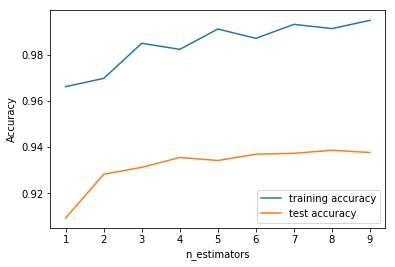

In [161]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [162]:
X_train.shape

(20498, 86)

In [163]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [10, 25, 50, 75, 86]} 

# instantiate the model
rfc3 = RandomForestClassifier()

# fit tree on training data
rfc3 = GridSearchCV(rfc3, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    return_train_score=True)
rfc3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [164]:
# Scores of GridSearch CV
scores = rfc3.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.395966,0.088463,0.012664,0.002234,10,{'max_features': 10},0.940976,0.937561,0.935610,0.940717,...,0.939116,0.002159,1,0.993231,0.992926,0.993658,0.993536,0.993963,0.993463,0.000357
1,3.390824,0.178805,0.010577,0.001284,25,{'max_features': 25},0.945366,0.937805,0.934146,0.938522,...,0.938579,0.003705,2,0.993719,0.993963,0.993170,0.993536,0.994268,0.993731,0.000373
2,7.499611,0.441866,0.008635,0.000539,50,{'max_features': 50},0.939756,0.938780,0.935854,0.937790,...,0.938140,0.001305,3,0.994573,0.993536,0.993963,0.993902,0.993841,0.993963,0.000338
3,11.422237,0.304486,0.010414,0.001111,75,{'max_features': 75},0.939268,0.936341,0.935122,0.938522,...,0.936921,0.001680,5,0.993780,0.994268,0.994146,0.993353,0.993231,0.993755,0.000413
4,13.241698,0.469358,0.009420,0.001835,86,{'max_features': 86},0.943415,0.936341,0.935366,0.939741,...,0.937896,0.003269,4,0.993048,0.994451,0.992865,0.993780,0.994512,0.993731,0.000685


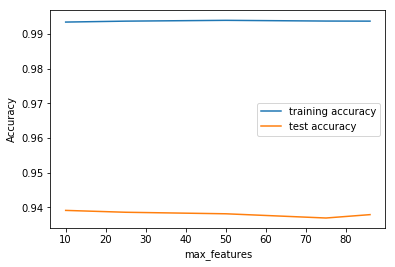

In [165]:
# Plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [166]:
# Create the parameter grid based on the results of random search  
param_grid = {'max_depth': [2,4,6],
              'n_estimators': [1,2,3],
              'max_features': [5,15,25] } 

# Create a based model 
rfc4 = RandomForestClassifier() 

# Instantiate the grid search 
model_GSV = GridSearchCV(estimator = rfc4, param_grid = param_grid,cv = 3, n_jobs = -1,verbose = 1) 

# Fit the grid search to the data grid_search.fit(X_train, y_train) 
model_GSV.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   13.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [167]:
print('We can get accuracy of',model_GSV.best_score_,'using',model_GSV.best_params_)

We can get accuracy of 0.9405307834910723 using {'max_depth': 6, 'max_features': 5, 'n_estimators': 3}


In [168]:
# model with the best hyperparameters from sklearn.ensemble
rfc_best = RandomForestClassifier(bootstrap=True,
                                  max_depth=4,
                                  max_features=20,
                                  n_estimators=2,
                                  class_weight={0:0.9,1:0.9}) 
rfc_best.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.9, 1: 0.9},
                       criterion='gini', max_depth=4, max_features=20,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=2, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [169]:
# Making predictions
predictions_inc = rfc_best.predict(X_test)

In [170]:
predictions_inc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [171]:
print(metrics.classification_report(y_test,predictions_inc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8114
           1       0.67      0.38      0.48       672

    accuracy                           0.94      8786
   macro avg       0.81      0.68      0.72      8786
weighted avg       0.93      0.94      0.93      8786



In [172]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions_inc))

[[7990  124]
 [ 420  252]]


In [173]:
print(accuracy_score(y_test,predictions_inc))

0.9380833143637606


In [174]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = pd.DataFrame(X_train, columns=X.columns).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [175]:
feature_importances.head(25)

,importance
loc_og_mou_8,0.047048
arpu_8,0.041811
loc_ic_t2m_mou_8,0.039757
loc_ic_mou_8,0.035939
loc_og_t2m_mou_8,0.035816
max_rech_amt_8,0.035304
total_og_mou_8,0.030353
last_day_rch_amt_8,0.025860
diff_bw_last_rech_7_8,0.023579
loc_ic_t2f_mou_8,0.023408


In [176]:
feature_importances_afterHPTuning = pd.DataFrame(rfc_best.feature_importances_,
                                                index = pd.DataFrame(X_train, columns=X.columns).columns,
                                                columns=['importance']).sort_values('importance',ascending=False)
feature_importances_afterHPTuning.head(10)

,importance
loc_ic_mou_8,0.663344
arpu_8,0.063756
total_ic_mou_8,0.041927
roam_ic_mou_8,0.039998
last_day_rch_amt_8,0.028222
offnet_mou_8,0.026604
roam_og_mou_8,0.023420
diff_bw_last_rech_7_8,0.021066
avg_monthly_3g_6_7,0.019595
std_ic_mou_8,0.012666


In [177]:
print(max(rfc.feature_importances_))

0.047047753683679625


In [178]:
print(max(rfc_best.feature_importances_))

0.663343886793368


In [179]:
pred_probs_test= rfc_best.predict_proba(X_test)[:,1] 
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.91'

In [180]:
y_pred_df = pd.DataFrame(pred_probs_test)
y_pred_df.head()

,0
0,0.014502
1,0.014502
2,0.014502
3,0.107732
4,0.031667


In [181]:
y_pred_1 = y_pred_df.iloc[:,[0]]
y_pred_1.head()

,0
0,0.014502
1,0.014502
2,0.014502
3,0.107732
4,0.031667


In [182]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
70334,0
69253,0
27939,0
8699,0
26567,0


In [183]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [184]:
y_pred_1.head()

,0
0,0.014502
1,0.014502
2,0.014502
3,0.107732
4,0.031667


In [185]:
y_test_df.head()

,churn
0,0
1,0
2,0
3,0
4,0


In [186]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [187]:
y_pred_final.head()

,churn,0
0,0,0.014502
1,0,0.014502
2,0,0.014502
3,0,0.107732
4,0,0.031667


In [188]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [189]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['churn','Churn_Prob'], axis=1)

In [190]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [191]:
y_pred_final.head()

,churn,Churn_Prob,predicted
0,0,0.014502,0
1,0,0.014502,0
2,0,0.014502,0
3,0,0.107732,0
4,0,0.031667,0


In [192]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[7990,  124],
       [ 420,  252]], dtype=int64)

In [193]:
#Check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.predicted)

0.9380833143637606

In [194]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.014502,0,1,0,0,0,0,0,0,0,0,0
1,0,0.014502,0,1,0,0,0,0,0,0,0,0,0
2,0,0.014502,0,1,0,0,0,0,0,0,0,0,0
3,0,0.107732,0,1,1,0,0,0,0,0,0,0,0
4,0,0.031667,0,1,0,0,0,0,0,0,0,0,0


In [195]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.076485  0.000000  1.000000
0.1   0.1  0.886524  0.897215  0.757440
0.2   0.2  0.928864  0.953907  0.626488
0.3   0.3  0.937969  0.971900  0.528274
0.4   0.4  0.940360  0.979295  0.470238
0.5   0.5  0.938083  0.984718  0.375000
0.6   0.6  0.937742  0.988415  0.325893
0.7   0.7  0.934669  0.994824  0.208333
0.8   0.8  0.923628  0.999630  0.005952
0.9   0.9  0.923515  1.000000  0.000000


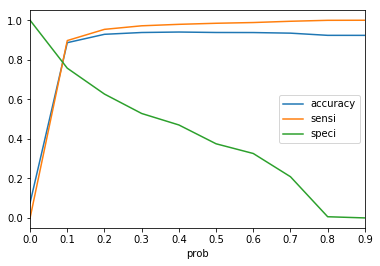

In [196]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [197]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

In [198]:
#Check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.final_predicted)

0.8865240154791714

In [199]:
metrics.confusion_matrix( y_pred_final.churn, y_pred_final.final_predicted )


array([[7280,  834],
       [ 163,  509]], dtype=int64)

## Important features

In [200]:
feature_importances_afterHPTuning= pd.DataFrame(rfc_best.feature_importances_,
                                   index = pd.DataFrame(X_train, columns=X.columns).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_afterHPTuning.head(10)


,importance
loc_ic_mou_8,0.663344
arpu_8,0.063756
total_ic_mou_8,0.041927
roam_ic_mou_8,0.039998
last_day_rch_amt_8,0.028222
offnet_mou_8,0.026604
roam_og_mou_8,0.023420
diff_bw_last_rech_7_8,0.021066
avg_monthly_3g_6_7,0.019595
std_ic_mou_8,0.012666


## Conclusion

The telecom data recieved had 99999 Rows, 226 columns. This data was subjected to cleaning, manipulation and treating the outliers and the resultant data has 29284 Rows, 86 Columns


## Evaluating the Models

**Results with PCA based logistic regression:**

Confusion Matrix:

[[6072, 2042]

[  73,  599]]
	   

Sensitivity: 0.8913690476190477

Accuracy: 0.7592761211017528

This is for identifying the churn customers.

**Results with Random Forest:**
    
Confusion Matrix:

[[7280,  834]

[ 163,  509]]

Accuracy: 0.8865240154791714

This is for identifying the important features.

## Conclusion Summary and Recommendations
- Offer discounted roaming on outgoing packs.
- Monitor the total recharge and offer additional talk time with additional validity on the recharges.
- Provide additional data on data pack recharges.
- Provide better network coverage.
- Finally, the frequent customer survey will play an important role in understanding and retaining the customer.